# Week 1 Ingesting and Exploring the Dataset

In [ ]:
# install wordcloud
!pip install wordcloud

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# change working directory
import os
os.getcwd()  # Get current working directory
os.chdir('..')  # Move up one directory level from notebooks
print(os.getcwd())
#os.chdir('../data') # change to the data folder

/


In [ ]:
# load the data
df = pd.read_csv('data/Combined Data.csv', index_col=0)

# make a copy and get rid of the missing values
df1 = df.copy()
df1.dropna(inplace = True)
df1.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


From the output, we can see that this dataset includes 2 variables: statement and status.

The statement variable is a text variable that contains different user inputs.

The status variable represents different emotional statuses, which contain different categories.

### The next step is to explore dataset

In [ ]:
# number of missing values
missing_values = df.isnull().sum()

print(missing_values)

statement    362
status         0
dtype: int64


The dataset contains 362 missing values in the 'Statement' column and no missing values for 'Status'.

In [ ]:
# get the rows and columns of the data
rows,columns = df1.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 52681
Number of columns: 2


The dataset includes 52,681 rows and 2 columns after removing missing values.

In [ ]:
# create a new column that gives the length of each statement
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))
df1.head()

,statement,status,statement_len
0,oh my gosh,Anxiety,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,I've shifted my focus to something else but I'...,Anxiety,11
4,"I'm restless and restless, it's been a month n...",Anxiety,14


We want to add a column to explore the length of each statement. This can help us quantify the user's input and support further analysis.

In [ ]:
# information about the dataset
'''The class type of the DataFrame.
The range of the index.
The number of columns and their names.
The count of non-null values in each column.
The data type of each column.
The memory usage of the DataFrame.'''

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
None


In [ ]:
# descriptive statistics
'''count is the number of non-null entries.
unique is the number of unique values.
top is the most frequent value.
freq is the frequency of the most frequent value.'''
df1.describe(include='object').T

,count,unique,top,freq
statement,52681,51073,what do you mean?,22
status,52681,7,Normal,16343


The 'Statement' column contains 51,073 unique values, indicating that most user inputs are unique. The most frequently appeared statement is "What do you mean?" and occurred 22 times in the dataset.

The 'Status' column contains 7 unique values and represents different emotion statuses. The most common status is "Normal", suggesting that over 30% of the statements in the dataset fall under this category.

In [ ]:
# Get summary statistics for the 'statement_len' column
summary_statistics = df1['statement_len'].describe()
print(summary_statistics)

count    52681.000000
mean       113.035914
std        163.501877
min          1.000000
25%         15.000000
50%         62.000000
75%        148.000000
max       6300.000000
Name: statement_len, dtype: float64


In [ ]:
# Calculate the mode of the 'statement_len' column
mode_value = df1['statement_len'].mode()[0]

print(f"The mode of the 'statement_len' column is: {mode_value}")

The mode of the 'statement_len' column is: 5


The summary statistics for the 'Statement_len' column show the distribution of statment lengths. The average statement contains 113 words with a standard deviation of 163.5 words. The shortest statement only has 1 word, while the longest contains 6300 words. The most frequent statement length is 5 words, indicating that short phrases are commonly used.

The following bar plot of the frequency of statement length visualizes the previous statement.

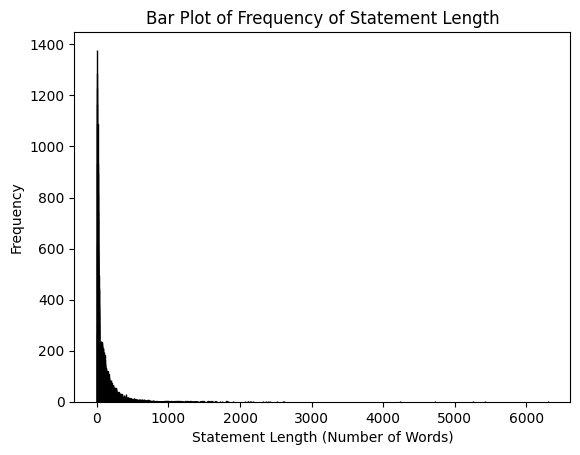

In [ ]:
# Create a bar plot of the frequency of the 'statement_len' column
statement_len_counts = df1['statement_len'].value_counts()

plt.bar(statement_len_counts.index, statement_len_counts.values, edgecolor='black')
plt.xlabel('Statement Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Bar Plot of Frequency of Statement Length')
plt.show()

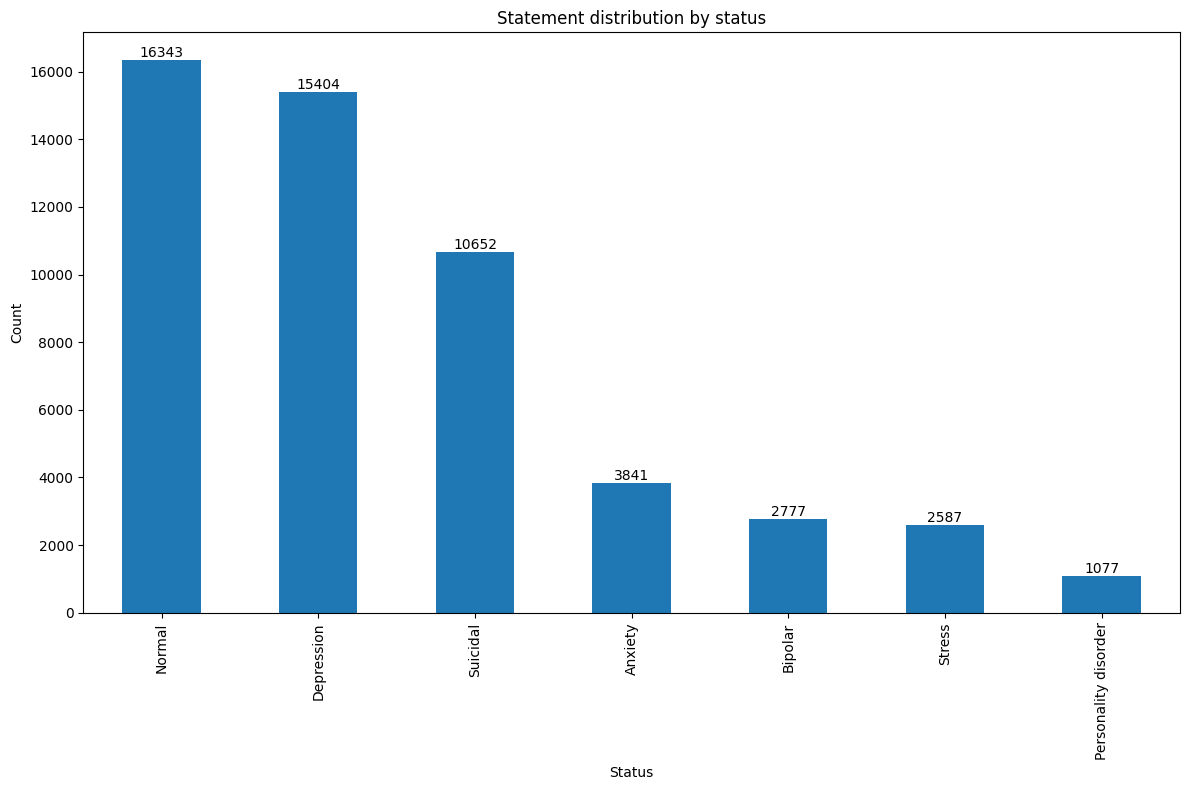

In [ ]:
# Histogram of Frequency of Statements by Status
plt.figure(figsize=(12,8))

# get the unique status values and their counts
status_counts = df1['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Here is a plot showing distribution by status. Normal is the most common status and contains 16343 data, followed by depression and suicidal, which are the 2nd and 3rd largest portions of the dataset. Personality disorder is the most rare one, which contains 1077 data.

The ratio between different statuses suggests about 70% of the user's input falls under the negative status category.

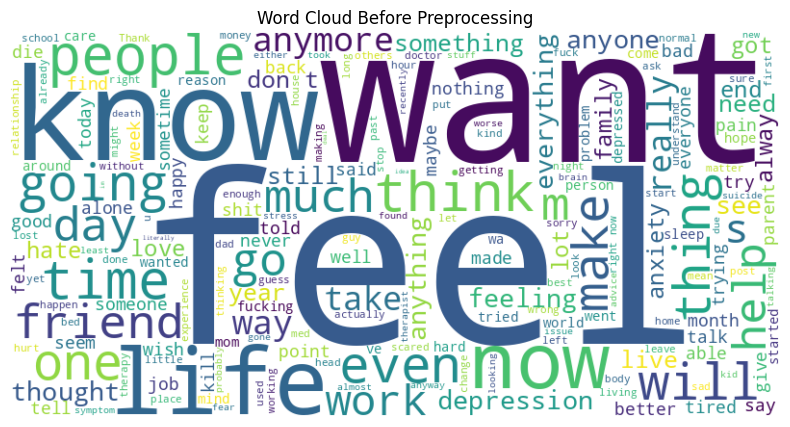

In [ ]:
# Word Cloud Before Preprocessing
# Combine all statements into a single string
text = ' '.join(df1['statement'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

Here is the word cloud for Statement before data processing, which will be used to compare with the data after processing. The word cloud shows that the most frequently used words are "feel," "want," "know," and "life.". The observation is reasonable considering verbs and similar expressions that reflect personal thoughts would be the biggest part of user inputs. We can also see words like "depression," "tired," and "anxiety" in the word cloud even before data processing, which matches our observation of the status distribution above.